# 1. Exploratory Data Analysis and Composer Selection

## 1.1 Introduction
The goal of this is project is to build a classification model that can recognize the composer of midi performances. The dataset that is used is the **MAESTRO Dataset V3.0.0**, it contains 200 hours of MIDI recordings from ten years of International Piano-e-Competition.

## 1.2 Loading the data

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

DATA_CSV = '../data/maestro-v3.0.0/maestro-v3.0.0.csv'

df = pd.read_csv(DATA_CSV)

print(f"Pieces: {len(df)}")
print(f"Unique Composers: {df['canonical_composer'].nunique()}")

display(df.head())

Pieces: 1276
Unique Composers: 60


,canonical_composer,canonical_title,split,year,midi_filename,audio_filename,duration
0,Alban Berg,Sonata Op. 1,train,2018,2018/MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R...,2018/MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R...,698.661160
1,Alban Berg,Sonata Op. 1,train,2008,2008/MIDI-Unprocessed_03_R2_2008_01-03_ORIG_MI...,2008/MIDI-Unprocessed_03_R2_2008_01-03_ORIG_MI...,759.518471
2,Alban Berg,Sonata Op. 1,train,2017,2017/MIDI-Unprocessed_066_PIANO066_MID--AUDIO-...,2017/MIDI-Unprocessed_066_PIANO066_MID--AUDIO-...,464.649433
3,Alexander Scriabin,"24 Preludes Op. 11, No. 13-24",train,2004,2004/MIDI-Unprocessed_XP_21_R1_2004_01_ORIG_MI...,2004/MIDI-Unprocessed_XP_21_R1_2004_01_ORIG_MI...,872.640588
4,Alexander Scriabin,"3 Etudes, Op. 65",validation,2006,2006/MIDI-Unprocessed_17_R1_2006_01-06_ORIG_MI...,2006/MIDI-Unprocessed_17_R1_2006_01-06_ORIG_MI...,397.857508


In [15]:
print(df['split'].value_counts())

split
train         962
test          177
validation    137
Name: count, dtype: int64


## 1.3 Data Split
The MAESTRO dataset comes with a pre-defined `split` column (Train/Test/Validation). If we were to split the data randomly ourselves (e.g., using `train_test_split` on extracted chunks), we might end up with chunks of the *same* performance in both the training and test sets.

split
train         962
test          177
validation    137
Name: count, dtype: int64


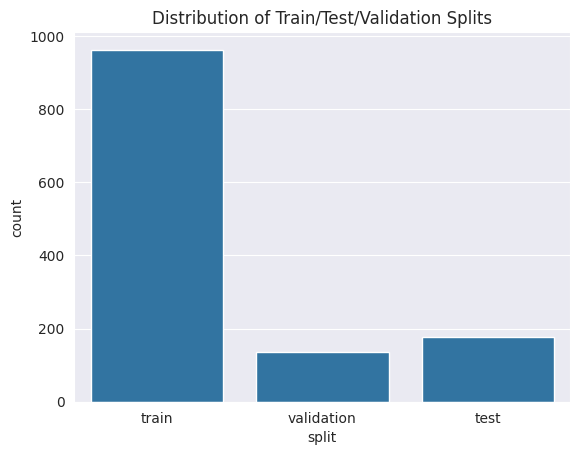

In [16]:
print(df['split'].value_counts())

plt.figure()
sns.countplot(x='split', data=df)
plt.title('Distribution of Train/Test/Validation Splits')
plt.show()

## 1.4 Composer distribution

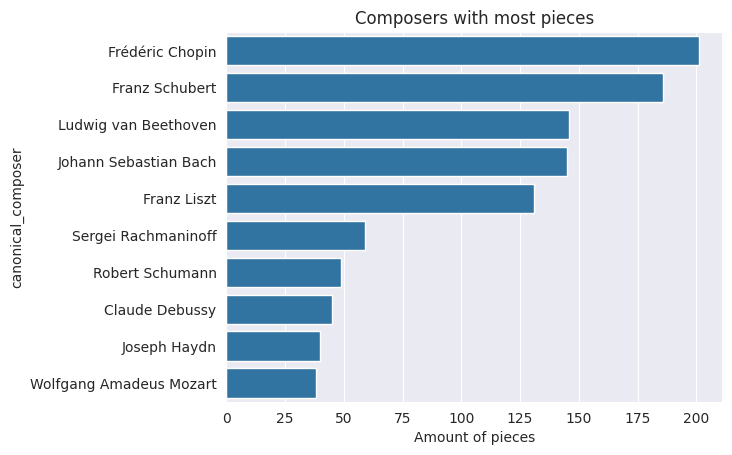

In [17]:
plt.figure()
top_composers = df['canonical_composer'].value_counts().head(10)
sns.barplot(x=top_composers.values, y=top_composers.index)
plt.title('Composers with most pieces')
plt.xlabel('Amount of pieces')
plt.show()

### Analysis of composer distribution

For this project, we will choose the 5 composers with the most data: **Chopin**, **Schubert**, **Beethoven**, **Bach** and **Liszt**. We will create a new csv that only includes these composers.

In [18]:
TARGET_COMPOSERS = [
    'Johann Sebastian Bach',
    'Ludwig van Beethoven',
    'Frédéric Chopin',
    'Franz Liszt',
    'Franz Schubert'
]

df_filtered = df[df['canonical_composer'].isin(TARGET_COMPOSERS)].copy()
df_filtered.to_csv('../data/filtered_maestro.csv', index=False)
print(len(df_filtered.values))

809
